In [4]:
import numpy as np
import pandas as pd
from statistics import mean
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

Implement 5-fold nested CV to find optimal parameter configuration for the model. Report: (1) tree visualization (2) the set of best parameters on each split (3) testing mse on each outer split (3) important splits / features (4) algorithm runtime

In [5]:
data = pd.get_dummies(pd.read_csv('ManualPreprocessedAmesHousing.csv'))

X = data.drop('SalePrice', axis=1).to_numpy()
y = data['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = range(30, 50, 2)
max_features = ['auto', 'sqrt']
max_depth = range(7, 17, 2)
min_samples_split = range(5, 15, 2)
min_samples_leaf = range(5, 15, 2)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

rf_random.best_params_

Tuning Hyperparamters. Blazingly slow.

In [ ]:
param_grid = {'n_estimators': range(45, 55, 2),
        'max_features': ['auto'],
        'max_depth': range(13, 18),
        'min_samples_split': range(8, 11),
        'min_samples_leaf': range(3, 5),
        'bootstrap': [True]}

kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    print('for this split, best params\n')
    print(grid_search.best_params_)
    best_rf = grid_search.best_estimator_
    score = mean_squared_error(y_test, best_rf.predict(X_test))
    print(f'for this split, the testing mse is {score:.4f}')

Fitting 4 folds for each of 150 candidates, totalling 600 fits
for this split, best params

{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 51}
for this split, the testing mse is 818.7269
Fitting 4 folds for each of 150 candidates, totalling 600 fits
for this split, best params

{'bootstrap': True, 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 51}
for this split, the testing mse is 460.3807
Fitting 4 folds for each of 150 candidates, totalling 600 fits
for this split, best params

{'bootstrap': True, 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 51}
for this split, the testing mse is 861.5864
Fitting 4 folds for each of 150 candidates, totalling 600 fits
for this split, best params

{'bootstrap': True, 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_esti

{'bootstrap': True, 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 51}

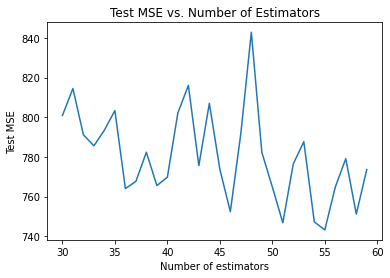

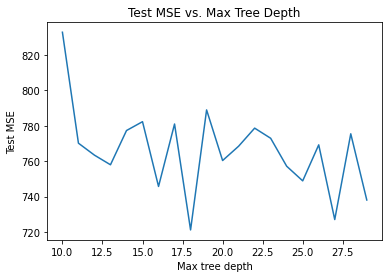

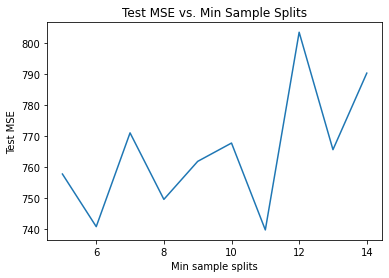

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_estimators = range(30, 60)
test_mse_estimators = []

max_depths = range(10, 30)
test_mse_depth  = []

min_samples_splits = range(5, 15)
test_mse_splits = []

for estimators in num_estimators:
      rf = RandomForestRegressor(n_estimators=estimators, min_samples_split=10, 
                                 min_samples_leaf=3,
                                 max_depth=17, bootstrap=True, 
                                 max_features='auto')
      rf.fit(X_train, y_train)
      test_mse_estimators.append(mean_squared_error(y_test, rf.predict(X_test)))

for depth in max_depths:
      rf = RandomForestRegressor(n_estimators=51, min_samples_split=10, 
                                 min_samples_leaf=3,
                                 max_depth=depth, bootstrap=True, 
                                 max_features='auto')
      rf.fit(X_train, y_train)
      test_mse_depth.append(mean_squared_error(y_test, rf.predict(X_test)))

for splits in min_samples_splits:
      rf = RandomForestRegressor(n_estimators=51, min_samples_split=splits, 
                                 min_samples_leaf=3,
                                 max_depth=17, bootstrap=True, 
                                 max_features='auto')
      rf.fit(X_train, y_train)
      test_mse_splits.append(mean_squared_error(y_test, rf.predict(X_test)))

plt.plot(num_estimators, test_mse_estimators)
plt.title('Test MSE vs. Number of Estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Test MSE')
plt.savefig('estimators.png')
plt.show()

plt.plot(max_depths, test_mse_depth)
plt.title('Test MSE vs. Max Tree Depth')
plt.xlabel('Max tree depth')
plt.ylabel('Test MSE')
plt.savefig('depth.png')
plt.show()

plt.plot(min_samples_splits, test_mse_splits)
plt.title('Test MSE vs. Min Sample Splits')
plt.xlabel('Min sample splits')
plt.ylabel('Test MSE')
plt.savefig('splits.png')
plt.show()